# Simple gene regulation

In [1]:
import numpy as np

In [2]:
def Dynamic_single_cell(alpha, beta, y):
    return beta - np.dot(alpha,y)

In [3]:
def temporal_y(alpha, beta):
    t = np.linspace(0,.1,100)
    y = np.zeros(100)
    for i in range(99):
        y[i+1] = Dynamic_single_cell(alpha, beta , y[i]) + y[i]
    return (t,y)

In [4]:
import matplotlib.pyplot as plt

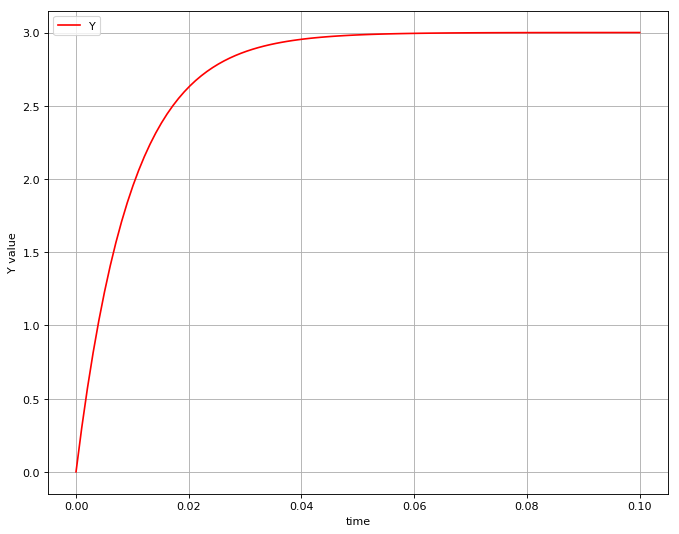

In [10]:
t,y = temporal_y(.1,.3)
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.xlabel('time')
plt.ylabel('Y value')
plt.plot(t,y,color='r',label='Y')
plt.legend(loc='best')

In [14]:
def response_time(y):
    return np.where(y >= y[-1]/2)[0][0]

In [16]:
print(t[response_time(y)])

0.0030303030303030303


0.007070707070707071
0.00505050505050505
0.00404040404040404
0.0030303030303030303


Text(0, 0.5, 'value')

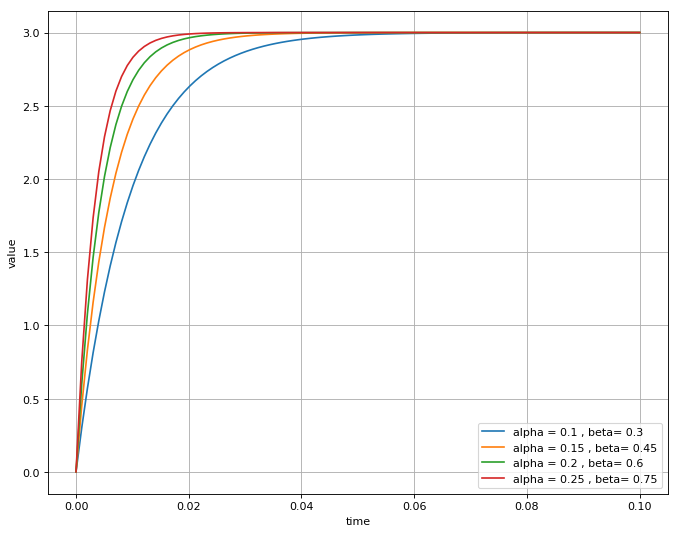

In [29]:
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()

t,y = temporal_y(.1,.3)
plt.plot(t,y,label='alpha = 0.1 , beta= 0.3')
print(t[response_time(y)])


t,y = temporal_y(.15,.45)
plt.plot(t,y,label='alpha = 0.15 , beta= 0.45')
print(t[response_time(y)])


t,y = temporal_y(.2,.6)
plt.plot(t,y,label='alpha = 0.2 , beta= 0.6')
print(t[response_time(y)])

t,y = temporal_y(.25,.75)
plt.plot(t,y,label='alpha = 0.25 , beta= 0.75')
print(t[response_time(y)])

plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('value')

# Regulatory cascade

In [30]:
def X(t,D):
    sig = np.sign(t)
    sig[(t>D)]=0
    return sig

Text(0, 0.5, 'value')

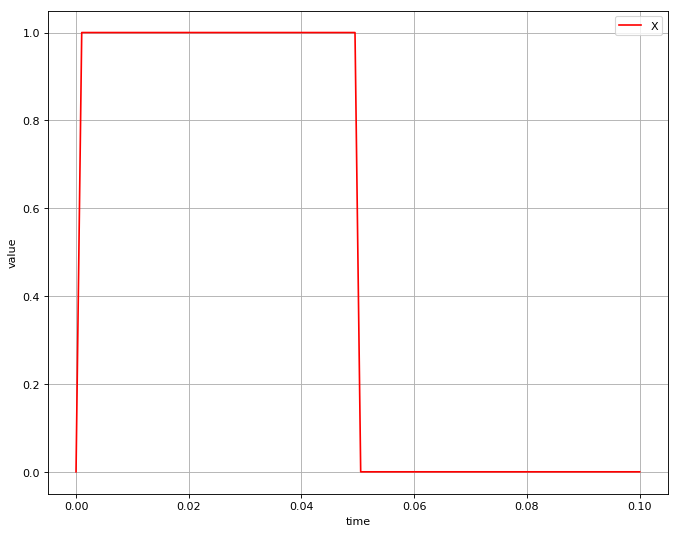

In [34]:
t = np.linspace(0,.1,100)
(t>.05)
x = X(t,0.05)
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.plot(t,x,color='r',label='X')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('value')

In [35]:
def Y(t,alpha,beta,x):
    y= np.zeros(100)
    for i in range(99):
        y[i+1] = beta*x[i+1] - alpha*y[i]+y[i]
        #print (x)
    return y

Text(0, 0.5, 'value')

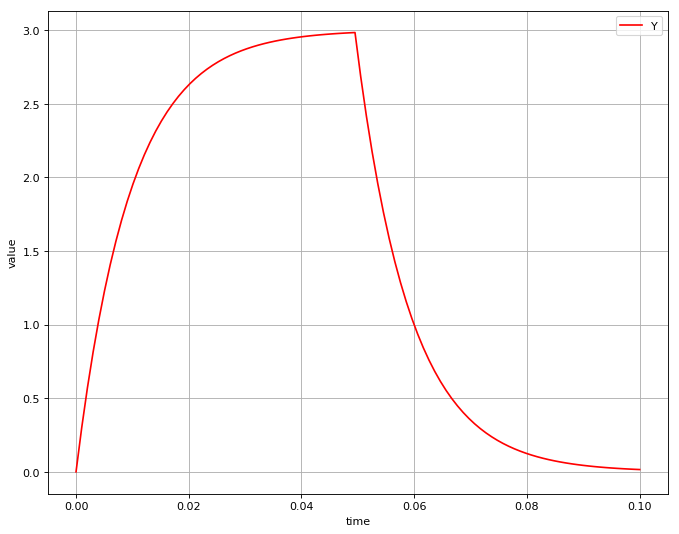

In [38]:
y = Y(t,0.1,0.3,x)
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.plot(t,y,color='r',label='Y')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('value')

In [39]:
def Z(y,alpha,beta,K_y):
    z = np.zeros(100)
    tmp = np.clip(np.sign(y-K_y),0,1)
    print(tmp)
    for i in range(99):
        z[i+1] = beta*tmp[i] -alpha * z[i] + z[i]
    return z

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Text(0, 0.5, 'value')

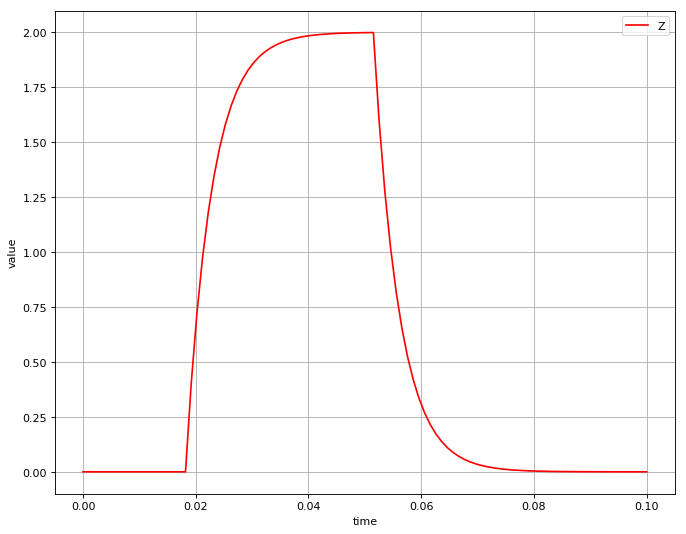

In [40]:

z = Z(y,0.2,0.4,2.5)
z
plt.figure(figsize=(10, 8), dpi=80)
plt.grid()
plt.plot(t,z,color='r',label='Z')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('value')
